In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
pd.options.mode.copy_on_write = True

In [6]:
df = pd.read_csv('C:/Users/Admin/Desktop/files for p/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
file = [file for file in os.listdir('C:/Users/Admin/Desktop/files for p/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

all_data = pd.DataFrame()
for file in file:
    df = pd.read_csv('C:/Users/Admin/Desktop/files for p/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+ file)
    all_data = pd.concat([all_data, df])

all_data.to_csv('all_data.csv', index=False)

In [7]:
all_data.tail(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11671,259344,AAA Batteries (4-pack),2,2.99,09/10/19 23:33,"721 Madison St, San Francisco, CA 94016"
11672,259345,ThinkPad Laptop,1,999.99,09/21/19 23:12,"406 Dogwood St, San Francisco, CA 94016"
11673,259346,Bose SoundSport Headphones,1,99.99,09/29/19 17:24,"484 Cedar St, New York City, NY 10001"
11674,259347,AA Batteries (4-pack),1,3.84,09/26/19 10:12,"979 Madison St, Los Angeles, CA 90001"
11675,259348,Lightning Charging Cable,1,14.95,09/30/19 21:03,"260 Spruce St, Boston, MA 02215"
11676,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001"
11677,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
11678,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
11679,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001"
11680,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016"


In [ ]:
###CLEANING DATA 

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
all_data.describe

<bound method NDFrame.describe of       Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19

In [11]:
null_data = all_data[all_data.isna().any(axis=1)]
null_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cl = all_data.dropna(inplace= True)

In [13]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [15]:
i = all_data[all_data['Quantity Ordered'].str[0:2] != 'Qu']
all_data= i

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] =  pd.to_numeric(all_data['Price Each'])

In [15]:
all_data.head(520)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150.00,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
521,177056,Flatscreen TV,1,300.00,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"


In [147]:
####Q1. Find which month was the peak sale.

In [17]:
all_data["Sale"] = all_data['Quantity Ordered']*all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [248]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,09


In [249]:
all_data.sort_values(by=['Sale'],ascending=False).head(1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month
6776,200528,Macbook Pro Laptop,2,1700.0,05/13/19 13:40,"643 4th St, Boston, MA 02215",3400.0,05


In [250]:
peak_sale = all_data.groupby('Month')['Sale'].sum()
ss= peak_sale.to_frame()

Text(0, 0.5, 'Sales')

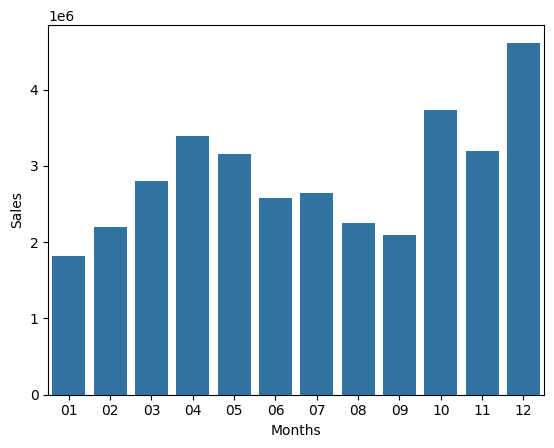

In [42]:
sns.barplot(x='Month', y='Sale', data=ss)
plt.xlabel('Months')
plt.ylabel('Sales')

In [44]:
#### What city has highest number of sale?

In [251]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [62]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles


In [252]:
City_Sale = all_data.groupby('City')['Sale'].sum()
x = City_Sale.to_frame()

Text(0, 0.5, 'Sales in Lakhs')

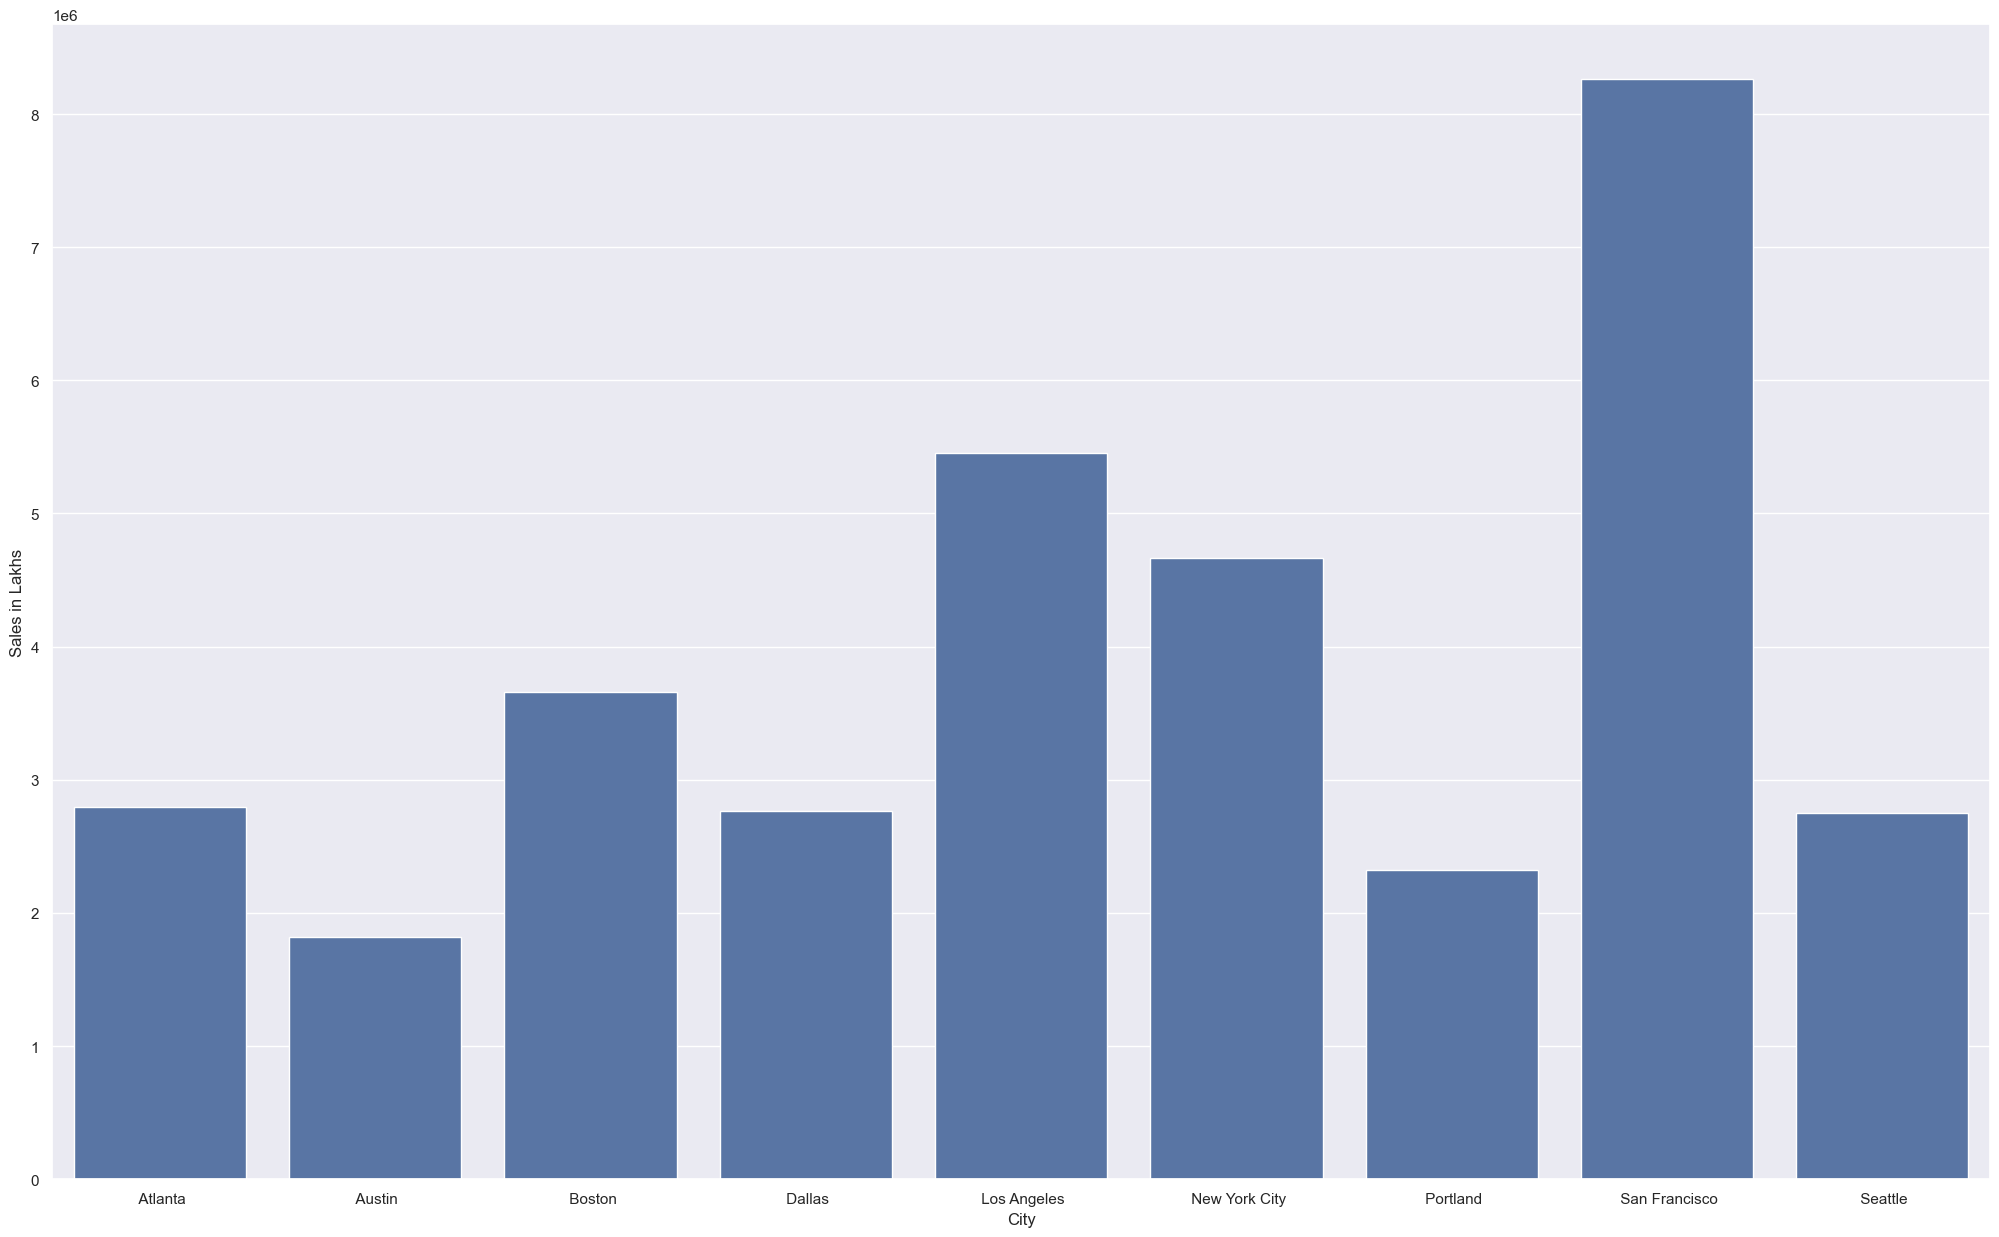

In [108]:
sns.barplot(x='City', y='Sale', data= x)
sns.set(rc={'figure.figsize':(25,15)})
plt.xlabel('City')
plt.ylabel('Sales in Lakhs')

In [142]:
#### To understand order placed with respect to timing.

In [253]:
all_data['Time'] = all_data['Order Date'].str[9:11]
all_data.sort_values(by="Time",ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City,Time
3854,197758,USB-C Charging Cable,1,11.95,05/18/19 23:00,"597 Sunset St, Dallas, TX 75001",11.95,05,Dallas,23
9637,257401,USB-C Charging Cable,1,11.95,09/21/19 23:06,"910 South St, San Francisco, CA 94016",11.95,09,San Francisco,23
7631,148504,Apple Airpods Headphones,1,150.00,01/12/19 23:19,"239 Center St, Seattle, WA 98101",150.00,01,Seattle,23
23847,318448,20in Monitor,1,109.99,12/24/19 23:59,"632 Park St, Portland, OR 97035",109.99,12,Portland,23
9137,202771,AA Batteries (4-pack),2,3.84,05/04/19 23:30,"622 Jefferson St, San Francisco, CA 94016",7.68,05,San Francisco,23
...,...,...,...,...,...,...,...,...,...,...
3335,298846,Google Phone,1,600.00,12/17/19 00:24,"103 Madison St, Austin, TX 73301",600.00,12,Austin,00
4554,166341,AAA Batteries (4-pack),1,2.99,03/02/19 00:27,"747 Highland St, Los Angeles, CA 90001",2.99,03,Los Angeles,00
3366,298874,34in Ultrawide Monitor,1,379.99,12/31/19 00:00,"534 Main St, Los Angeles, CA 90001",379.99,12,Los Angeles,00
4518,166308,AAA Batteries (4-pack),1,2.99,03/21/19 00:01,"514 Johnson St, Los Angeles, CA 90001",2.99,03,Los Angeles,00


In [254]:
xx = all_data.groupby('Time')['Quantity Ordered'].count()
xxx = xx.to_frame()

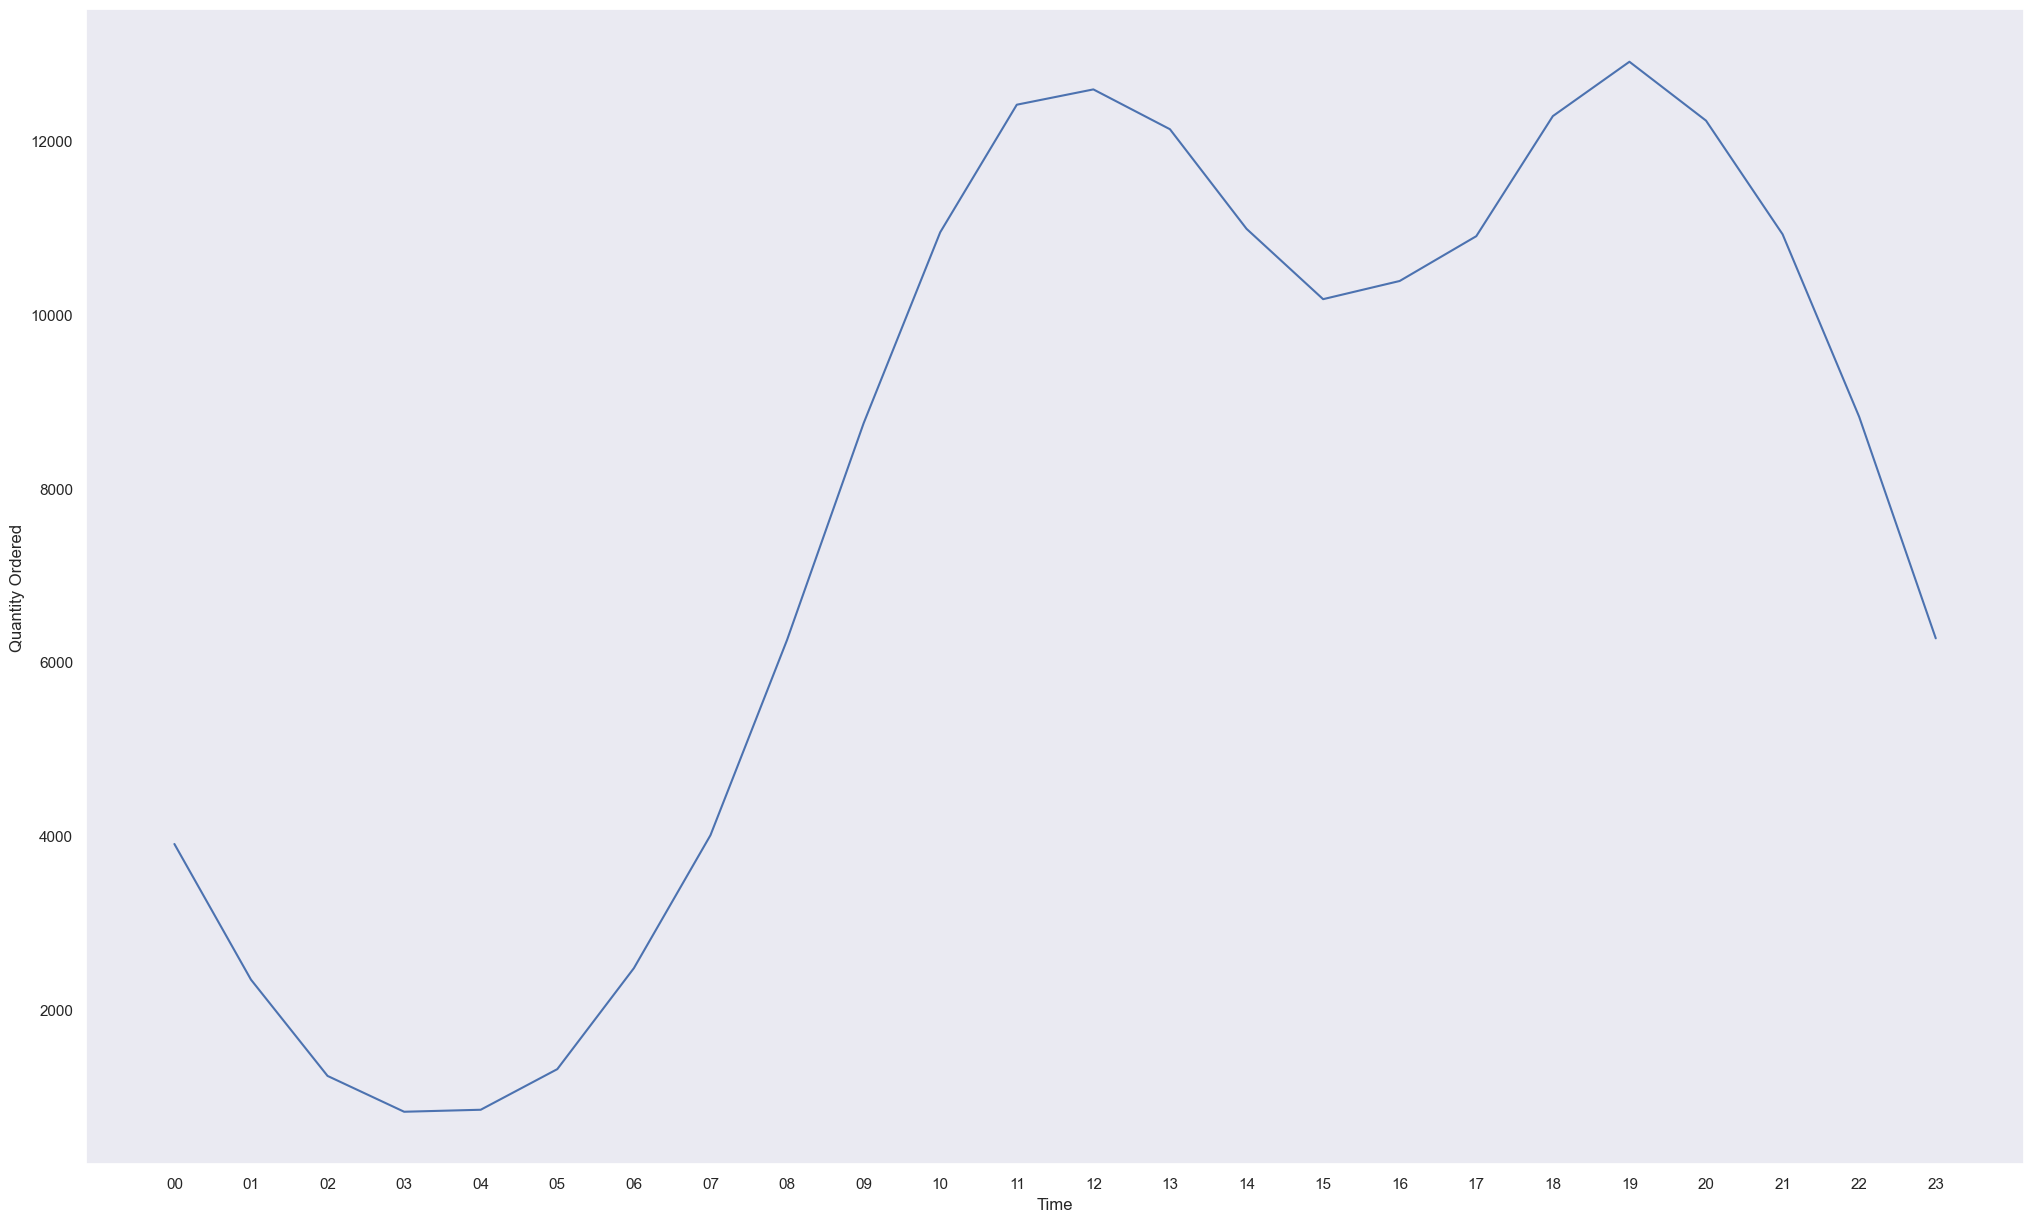

In [225]:
sns.lineplot(x='Time', y='Quantity Ordered', data=xxx)
plt.grid()
plt.show()

In [255]:
all_data['Order ID'].duplicated().sum()

7513

In [256]:
all_data['Order ID']=all_data['Order ID'].astype('int')

In [257]:
all_data.dtypes

Order ID              int32
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Sale                float64
Month                object
City                 object
Time                 object
dtype: object

In [276]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Group'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.drop_duplicates('Order ID')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City,Time,Group
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,04,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",5.98,04,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",14.95,04,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
11617,259296,Apple Airpods Headphones,1,150.00,09/28/19 16:48,"894 6th St, Dallas, TX 75001",150.00,09,Dallas,16,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",700.00,09,Boston,18,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",379.99,09,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,09,Atlanta,00,"Wired Headphones,AAA Batteries (4-pack)"


In [8]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
